IMPORT THE DATASET

In [128]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
x=df.iloc[:,:]
x.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


COLLECT DATA FOR ANY ONE STATE(I DID CALIFORNIA)

In [134]:
x_grp=x.groupby(x.State)
x_cal=x_grp.get_group('California')
x_cal

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
6,134615.46,147198.87,127716.82,California,156122.51
9,123334.88,108679.17,304981.62,California,149759.96
11,100671.96,91790.61,249744.55,California,144259.40
13,91992.39,135495.07,252664.93,California,134307.35
16,78013.11,121597.55,264346.06,California,126992.93
20,76253.86,113867.30,298664.47,California,118474.03
25,64664.71,139553.16,137962.62,California,107404.34
32,63408.86,129219.61,46085.25,California,97427.84
34,46426.07,157693.92,210797.67,California,96712.80


PLOT THE R&D WITH COMPARISON TO MARKETING BY PLOTTING AGAINST THE PROFIT

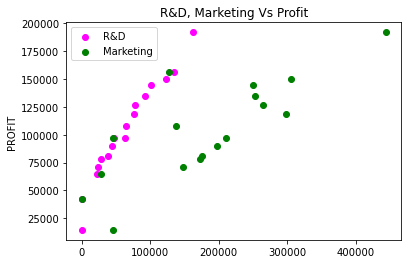

In [139]:
import matplotlib.pyplot as plt
plt.scatter(x_cal.iloc[:,0],x_cal.iloc[:,4],color="magenta")
plt.scatter(x_cal.iloc[:,2],x_cal.iloc[:,4],color="green")
plt.ylabel("PROFIT")
plt.title('R&D, Marketing Vs Profit')
plt.legend(['R&D','Marketing'])
plt.show()

SPLITTING THE SET- SO AS TO PREDICT PROFIT(USING R&D AND MARKETING)

In [135]:
from sklearn.model_selection import train_test_split
x_cal_t=x_cal[['R&D Spend','Marketing Spend']]
y_cal_t=x_cal[['Profit']]
x_train, x_test, y_train, y_test = train_test_split(x_cal_t, y_cal_t, test_size=0.2, random_state=1)

PERFORM MULTIVARIATE LINEAR REGRESSION

In [38]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [82]:
PREDICT THE TRAINING SET RESULTS

In [140]:
from IPython.display import display_html 
y_pred=regressor.predict(x_train)
df1_styler = y_train.style.set_table_attributes("style='display:inline'")
df2_styler = pd.DataFrame(y_pred,columns=['Predicted Profit']).style.set_table_attributes("style='display:inline'")
display_html(df1_styler._repr_html_()+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+df2_styler._repr_html_(), raw=True)

,Profit
20,118474.030000
37,89949.140000
13,134307.350000
6,156122.510000
44,65200.330000
1,191792.060000
49,14681.400000
47,42559.730000
34,96712.800000
32,97427.840000


In [ ]:
PREDICT THE TEST SET RESULTS

In [117]:
y_pred_test=regressor.predict(x_test)
df1_styler = y_test.style.set_table_attributes("style='display:inline'")
df2_styler = pd.DataFrame(y_pred_test,columns=['Predicted Profit']).style.set_table_attributes("style='display:inline'")
display_html(df1_styler._repr_html_()+"&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"+df2_styler._repr_html_(), raw=True)

,Profit
11,144259.400000
42,71498.490000
25,107404.340000
9,149759.960000
,Predicted Profit
0,137457.562108
1,67336.931632
2,100666.314812
3,159668.977270


In [ ]:
TRAINING DATA VISUALIZATION

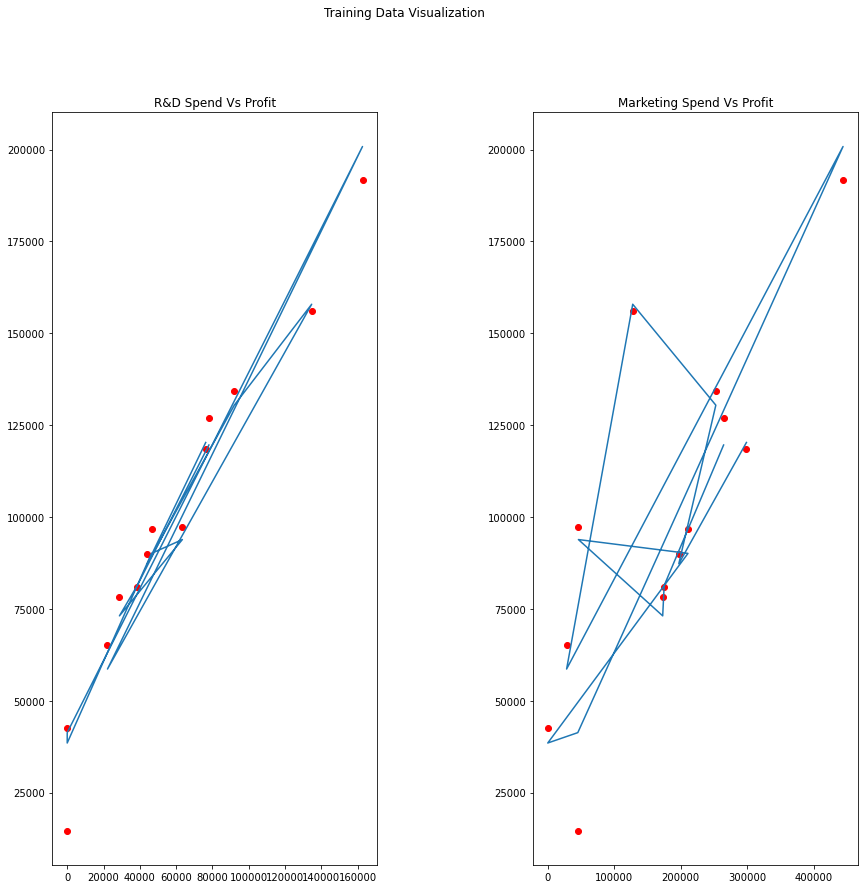

In [114]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(x_train[['R&D Spend']],y_pred)
ax1.scatter(x_train[['R&D Spend']],y_train,color="red")
ax1.set_title('R&D Spend Vs Profit')
ax2.plot(x_train[['Marketing Spend']],y_pred)
ax2.scatter(x_train[['Marketing Spend']],y_train,color="red")
ax2.set_title('Marketing Spend Vs Profit')
fig.tight_layout(pad=2.0)
fig.set_figheight(14)
fig.set_figwidth(14)
fig.suptitle("Training Data Visualization")
plt.show()

In [ ]:
TEST DATA VISUALIZATION

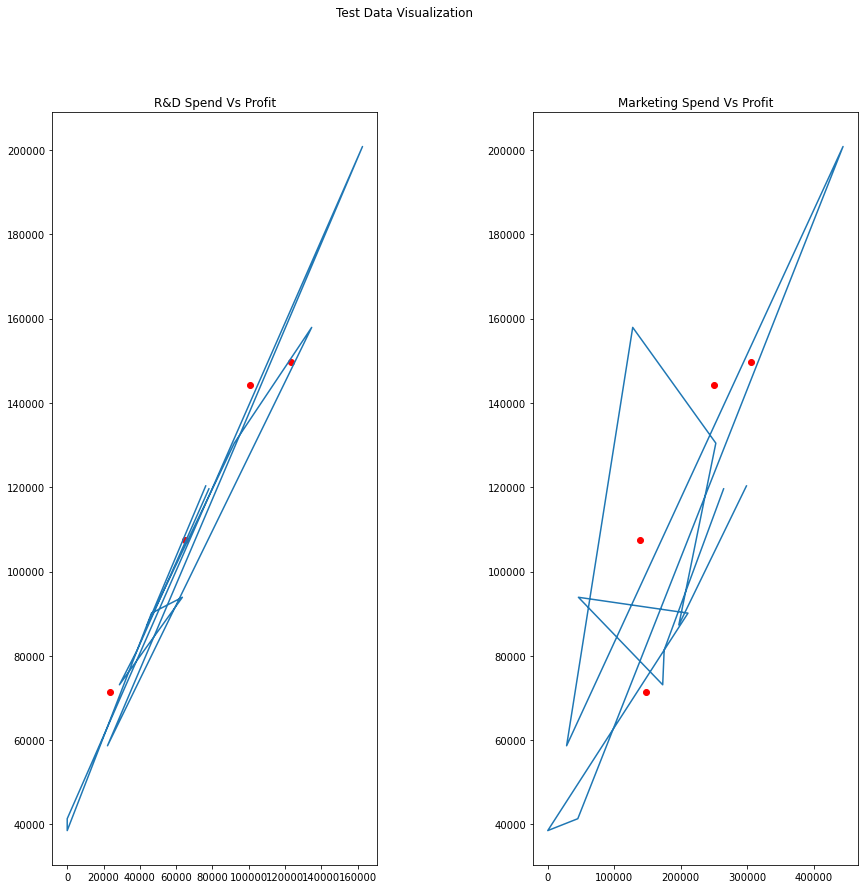

In [115]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.plot(x_train[['R&D Spend']],y_pred)
ax1.scatter(x_test[['R&D Spend']],y_test,color="red")
ax1.set_title('R&D Spend Vs Profit')
ax2.plot(x_train[['Marketing Spend']],y_pred)
ax2.scatter(x_test[['Marketing Spend']],y_test,color="red")
ax2.set_title('Marketing Spend Vs Profit')
fig.tight_layout(pad=2.0)
fig.set_figheight(14)
fig.set_figwidth(14)
fig.suptitle("Test Data Visualization")
plt.show()

If I invest 170,000 in R&D and 4,568,900 in marketing, Profit-->

In [142]:
p=regressor.predict([[170000,4568900]])
print("R&D = 170,000\nMarketing = 4,568,900\nExpected Profit =",p[0][0])

R&D = 170,000
Marketing = 4,568,900
Expected Profit = 464805.85440329456
